In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns

In [2]:
train = pd.read_pickle(r'../input/tree-model-with-time-and-freq-domain-feature/train.pkl')
test = pd.read_pickle(r'../input/tree-model-with-time-and-freq-domain-feature/test.pkl')

In [3]:
test.head()

,segment_id,time_to_eruption,sensor_1_mean,sensor_2_mean,sensor_3_mean,sensor_4_mean,sensor_5_mean,sensor_6_mean,sensor_7_mean,sensor_8_mean,...,sensor_10_A_pow,sensor_10_A_num,sensor_10_BH_pow,sensor_10_BH_num,sensor_10_BL_pow,sensor_10_BL_num,sensor_10_C_pow,sensor_10_C_num,sensor_10_D_pow,sensor_10_D_num
0,1000213997,0,4.462476,NaN,3.584690,-3.677255,0.932501,-0.119815,-0.801103,-0.580557,...,0.000000,12220.0,0.000000,3290.0,0.000000,940.0,0.000000,470.0,0.000000,2350.0
1,100023368,0,0.838103,NaN,1.009217,-0.757037,0.340894,1.764721,-8.099515,1.104198,...,0.000000,0.0,75226.889831,1254.0,98537.747734,865.0,51207.652288,437.0,235808.139324,2130.0
2,1000488999,0,0.794903,-4.740871,2.116098,-0.380610,NaN,12.569107,1.533874,2.943134,...,0.000000,12220.0,0.000000,3290.0,0.000000,940.0,0.000000,470.0,0.000000,2350.0
3,1001028887,0,1.953717,NaN,0.404360,-0.522891,-0.576881,-1.218796,-1.544341,1.841369,...,0.000000,12220.0,0.000000,3290.0,0.000000,940.0,0.000000,470.0,0.000000,2350.0
4,1001857862,0,-3.984584,-3.306728,0.898585,-2.389910,-0.001767,2.661156,0.937434,1.873502,...,2422.908929,53.0,110397.073637,1609.0,86562.863146,825.0,36972.642171,410.0,236747.975470,2110.0


In [4]:
## adversarial validation
train['ad_valid'] = 0
test['ad_valid'] = 1
data = pd.concat([train, test], axis=0)
# shuffle
data = data.sample(frac=1).reset_index(drop=True)
params = {}
model_adv = lgb.LGBMClassifier(**params)
model_adv.fit(data.drop(['ad_valid', 'segment_id', 'time_to_eruption'], 
                        axis=1), data.loc[:, 'ad_valid'])

LGBMClassifier()

In [5]:
test_pred = model_adv.predict_proba(test.drop(['ad_valid', 'segment_id', 'time_to_eruption'], axis=1))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

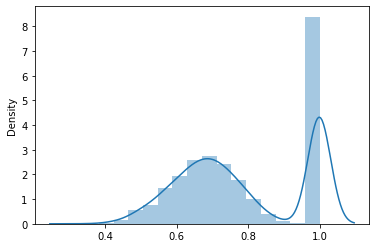

In [6]:
# distribution
# 2 types as https://www.kaggle.com/c/predict-volcanic-eruptions-ingv-oe/discussion/215463
sns.distplot(test_pred[:, 1])